In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

import lib.qc_extensions
from lib.ql_matrices import Bases, display_matrix

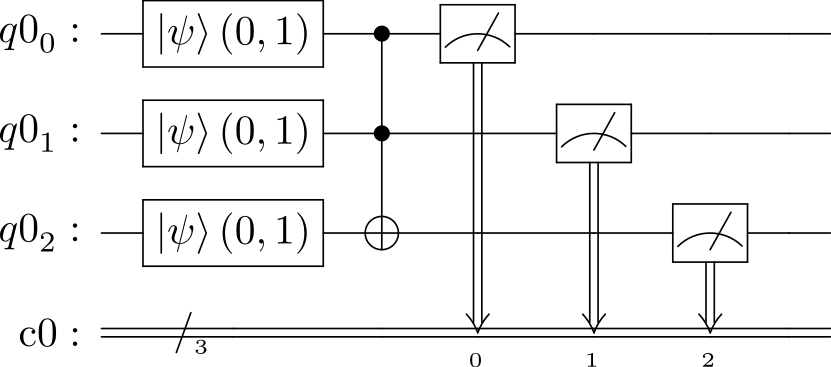

{'011': 1024}


In [2]:
class ToffoliCircuit(QuantumCircuit):
    def __init__(self):
        q = QuantumRegister(3)  # three qubits quantum register
        c = ClassicalRegister(3)  # three bits classical register
        super().__init__(q, c)

        self.initialize(Bases.bras.one, 0)
        self.initialize(Bases.bras.one, 1)
        self.initialize(Bases.bras.one, 2)

        self.ccx(0, 1, 2)
        self.measure(q, c)


tc = ToffoliCircuit()
display(tc.visualize())
result = tc.simulate()
print(result.get_counts())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


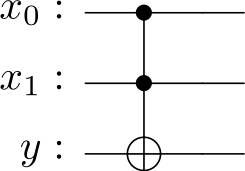

In [3]:
class Toffoli(QuantumCircuit):
    def __init__(self):
        control = QuantumRegister(2, name="x")
        x = QuantumRegister(1, name="y")
        super().__init__(control, x)

        print(self.sv())

        self.ccx(control[0], control[1], x)


t = Toffoli()
display(t.visualize())

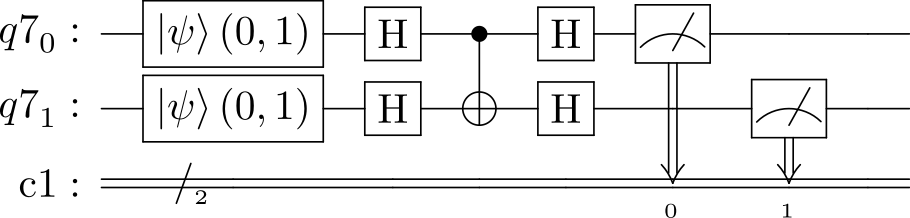

{'10': 1024}


In [4]:
class AltCNOT(QuantumCircuit):
    def __init__(self):
        q = QuantumRegister(2)  # three qubits quantum register
        c = ClassicalRegister(2)  # three bits classical register
        super().__init__(q, c)

        self.initialize(Bases.bras.one, 0)
        self.initialize(Bases.bras.one, 1)

        self.h(0)
        self.h(1)
        self.cx(0, 1)
        self.h(0)
        self.h(1)

        self.measure(0, 0)
        self.measure(1, 1)


acn = AltCNOT()
display(acn.visualize())
result = acn.simulate()
print(result.get_counts())

[ 0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]


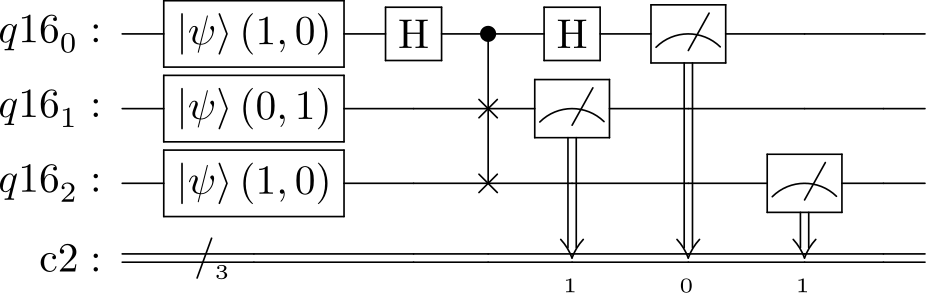

{'011': 274, '001': 236, '000': 250, '010': 264}


In [5]:
class HellCircuit(QuantumCircuit):
    def __init__(self):
        q = QuantumRegister(3)  # three qubits quantum register
        c = ClassicalRegister(3)  # three bits classical register
        super().__init__(q, c)

        self.initialize(Bases.bras.zero, 0)
        self.initialize(Bases.bras.one, 1)
        self.initialize(Bases.bras.zero, 2)

        self.h(0)
        self.cswap(0, 1, 2)
        self.h(0)
        print(self.sv())

        self.measure(0, 0)
        self.measure(1, 1)
        self.measure(2, 1)


hc = HellCircuit()
display(hc.visualize())
result = hc.simulate()
print(result.get_counts())

Matrix([
[-1.22464679914735e-16 - 0.5*I],
[-6.12323399573677e-17 - 0.5*I],
[-6.12323399573676e-17 - 0.5*I],
[                       -0.5*I]])

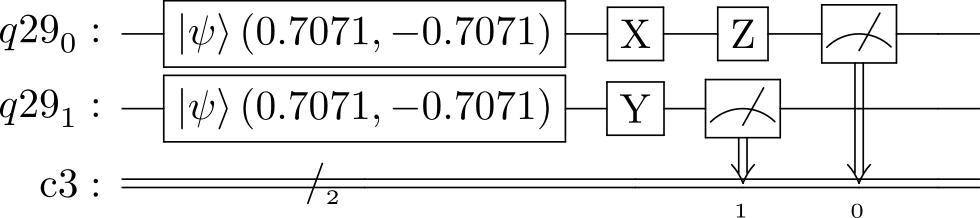

{'11': 235, '01': 262, '10': 265, '00': 262}


In [6]:
class XZ_vs_Y(QuantumCircuit):
    def __init__(self):
        q = QuantumRegister(2)  # three qubits quantum register
        c = ClassicalRegister(2)  # three bits classical register
        super().__init__(q, c)

        self.initialize(Bases.bras.minus, 0)
        self.initialize(Bases.bras.minus, 1)

        self.x(0)
        self.z(0)

        self.y(1)
        display_matrix(self.sv())

        self.measure(0, 0)
        self.measure(1, 1)


hc = XZ_vs_Y()
display(hc.visualize())
result = hc.simulate()
print(result.get_counts())